In [1]:
%load_ext autoreload
%autoreload 2

import os
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt


import functions as f

In [2]:
housing = f.load_csv_data(f.HOUSING_PATH, "housing.csv")

In [3]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


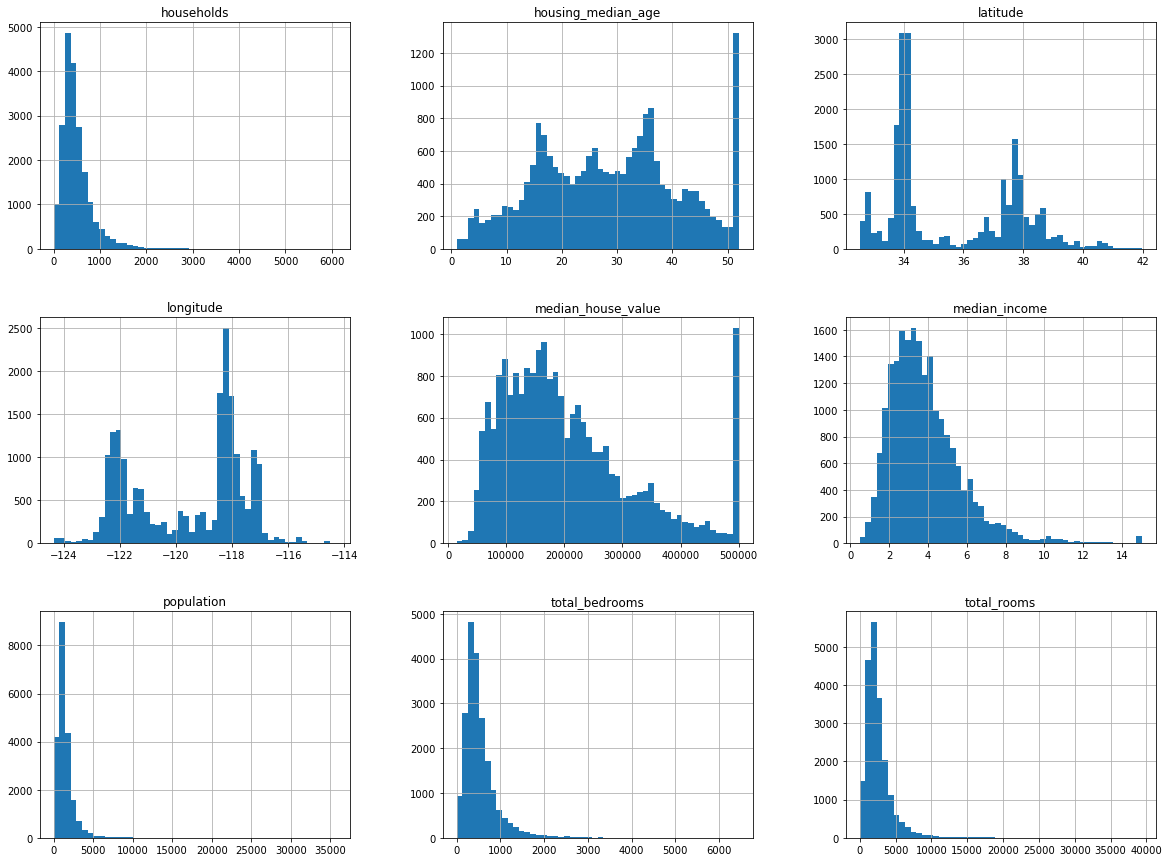

In [6]:
housing.hist(bins=50, figsize=(20,15))
plt.show()

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
train_data, test_data = train_test_split(housing, test_size = 0.2, random_state=42)

In [9]:
train_data.shape, test_data.shape

((16512, 10), (4128, 10))

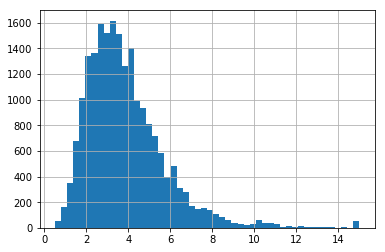

In [10]:
housing["median_income"].hist(bins=50)
plt.show()

In [11]:
housing["income_cat"] = np.ceil(housing["median_income"]/1.5)
housing["income_cat"].where(housing["income_cat"] < 5, 5, inplace=True)

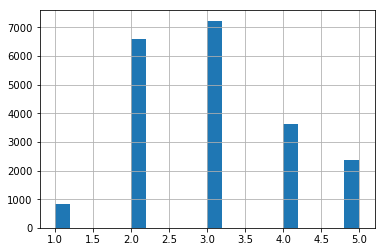

In [12]:
housing["income_cat"].hist(bins=20)
plt.show()

In [13]:
from sklearn.model_selection import StratifiedShuffleSplit

In [14]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strati_train_data = housing.loc[train_index]
    strati_test_data = housing.loc[test_index]

In [15]:
strati_train_data.shape, strati_test_data.shape

((16512, 11), (4128, 11))

In [16]:
for set in (strati_train_data, strati_test_data):
    set.drop(["income_cat"], axis=1, inplace=True)

In [17]:
strati_train_data.shape, strati_test_data.shape

((16512, 10), (4128, 10))

In [18]:
housing = strati_train_data.copy()

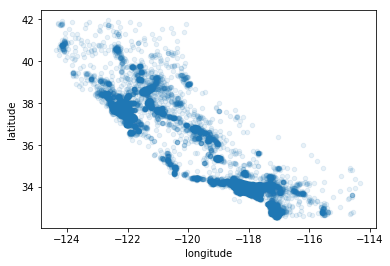

In [19]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)
plt.show()

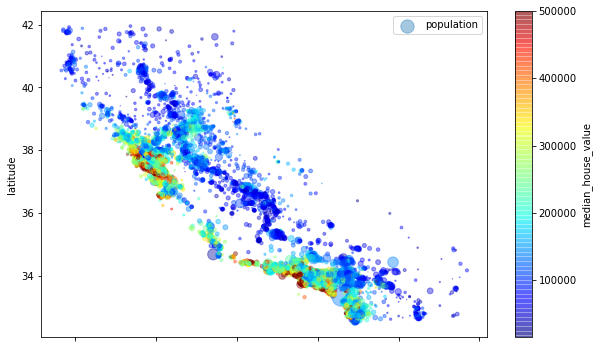

In [20]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
            s=housing["population"]/100, label="population",
            c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True, figsize=(10,6))
plt.show()

In [21]:
corr_matrix = housing.corr()

In [22]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

In [23]:
from pandas.plotting import scatter_matrix

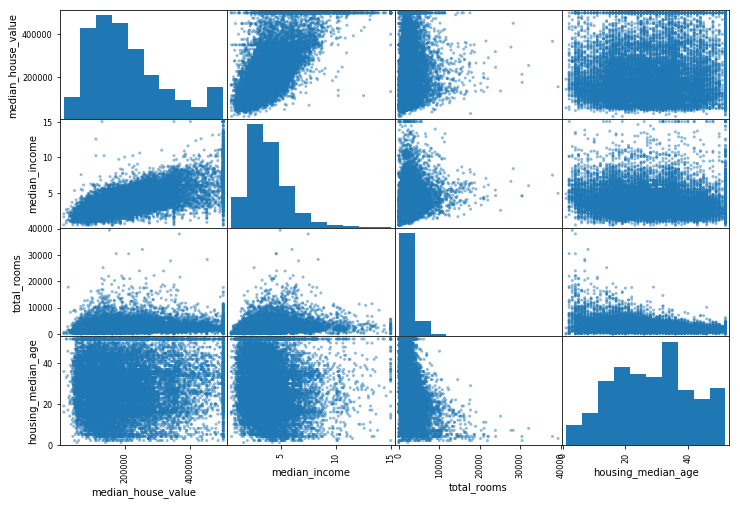

In [24]:
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))
plt.show()

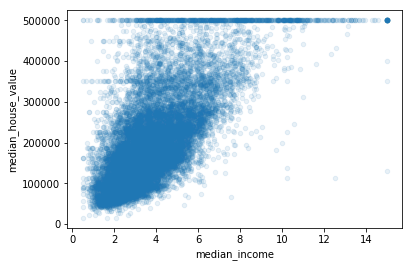

In [25]:
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1)

In [26]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"] = housing["population"]/housing["households"]

In [27]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

In [28]:
housing = strati_train_data.drop("median_house_value", axis=1)
housing_labels = strati_train_data["median_house_value"].copy()

In [29]:
from sklearn.impute import SimpleImputer

In [30]:
imputer = SimpleImputer(strategy="median")
housig_num = housing.drop("ocean_proximity", axis=1)
imputer.fit(housig_num)

SimpleImputer(copy=True, fill_value=None, missing_values=nan,
       strategy='median', verbose=0)

In [31]:
X = imputer.transform(housig_num)
housing_tr = pd.DataFrame(X, columns=housig_num.columns)
housing_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 8 columns):
longitude             16512 non-null float64
latitude              16512 non-null float64
housing_median_age    16512 non-null float64
total_rooms           16512 non-null float64
total_bedrooms        16512 non-null float64
population            16512 non-null float64
households            16512 non-null float64
median_income         16512 non-null float64
dtypes: float64(8)
memory usage: 1.0 MB


In [66]:
from sklearn.preprocessing import LabelBinarizer, OneHotEncoder

In [33]:
encoder = LabelBinarizer()
housing_cat_1hot = encoder.fit_transform(housing["ocean_proximity"])

In [34]:
housing_cat_1hot

array([[1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       ...,
       [0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0]])

In [35]:
import classes as c

In [36]:
attr_adder = c.CombinedAttributeAdder(add_bedrooms_per_room = False)

In [37]:
attr_adder.fit_transform(housing.values)

array([[-121.89, 37.29, 38.0, ..., '<1H OCEAN', 4.625368731563422,
        2.094395280235988],
       [-121.93, 37.05, 14.0, ..., '<1H OCEAN', 6.008849557522124,
        2.7079646017699117],
       [-117.2, 32.77, 31.0, ..., 'NEAR OCEAN', 4.225108225108225,
        2.0259740259740258],
       ...,
       [-116.4, 34.09, 9.0, ..., 'INLAND', 6.34640522875817,
        2.742483660130719],
       [-118.01, 33.82, 31.0, ..., '<1H OCEAN', 5.50561797752809,
        3.808988764044944],
       [-122.45, 37.77, 52.0, ..., 'NEAR BAY', 4.843505477308295,
        1.9859154929577465]], dtype=object)

In [38]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [39]:
num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("atribs_adder", c.CombinedAttributeAdder()),
    ("std_scaler", StandardScaler())
])

In [40]:
num_pipeline.fit_transform(housig_num)

array([[-1.15604281,  0.77194962,  0.74333089, ..., -0.31205452,
        -0.08649871,  0.15531753],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.21768338,
        -0.03353391, -0.83628902],
       [ 1.18684903, -1.34218285,  0.18664186, ..., -0.46531516,
        -0.09240499,  0.4222004 ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.3469342 ,
        -0.03055414, -0.52177644],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.02499488,
         0.06150916, -0.30340741],
       [-1.43579109,  0.99645926,  1.85670895, ..., -0.22852947,
        -0.09586294,  0.10180567]])

In [41]:
num_attribs = housig_num.columns
cat_attribs = ["ocean_proximity"]

In [42]:
num_pipeline = Pipeline([
    ("selector", c.DataFrameSelector(num_attribs)),
    ("imputer", SimpleImputer(strategy="median")),
    ("atribs_adder", c.CombinedAttributeAdder()),
    ("std_scaler", StandardScaler()),
])

In [67]:
cat_pipeline = Pipeline([
    ("selector", c.DataFrameSelector(cat_attribs)),
    ("one_hot_encoder", OneHotEncoder(sparse=False)),
])

In [68]:
from sklearn.pipeline import FeatureUnion

In [69]:
full_pipeline = FeatureUnion([
    ("num_pipeline", num_pipeline),
    ("cat_pipeline", cat_pipeline)
])

In [70]:
cat_selector = c.DataFrameSelector(cat_attribs)

In [72]:
housing_prepared = full_pipeline.fit_transform(housing)

In [74]:
from sklearn.linear_model import LinearRegression

In [75]:
lin_reg = LinearRegression().fit(housing_prepared, housing_labels)

In [76]:
y_pred = lin_reg.predict(housing_prepared[:5])

In [78]:
print("pred:", y_pred)
print("actual:", housing_labels.values[:5])

pred: [210644.60459286 317768.80697211 210956.43331178  59218.98886849
 189747.55849879]
actual: [286600. 340600. 196900.  46300. 254500.]


In [79]:
from sklearn.metrics import mean_squared_error

In [80]:
housing_predictions = lin_reg.predict(housing_prepared)
mse = mean_squared_error(housing_labels, housing_predictions)

In [82]:
rmse = np.sqrt(mse)
rmse

68628.19819848923

In [83]:
from sklearn.tree import DecisionTreeRegressor

In [84]:
tree_reg = DecisionTreeRegressor().fit(housing_prepared, housing_labels)

In [85]:
housing_predictions = tree_reg.predict(housing_prepared)
mse = mean_squared_error(housing_labels, housing_predictions)
rmse = np.sqrt(mse)
rmse

0.0

In [86]:
from sklearn.model_selection import cross_val_score

In [94]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
tree_scores = cross_val_score(tree_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)

In [95]:
f.display_scores(np.sqrt(-lin_scores))

scores: [66782.73843989 66960.118071   70347.95244419 74739.57052552
 68031.13388938 71193.84183426 64969.63056405 68281.61137997
 71552.91566558 67665.10082067]
mean: 69052.46136345083
standad deviation: 2731.674001798349


In [96]:
f.display_scores(np.sqrt(-tree_scores))

scores: [66807.70335914 66879.60496725 70445.16676255 70302.25627754
 70495.2718265  74768.05217609 71195.83133721 71482.09820269
 77136.73761371 69186.02208896]
mean: 70869.87446116318
standad deviation: 3014.169317368626


In [97]:
from sklearn.ensemble import RandomForestRegressor

In [98]:
forest_reg = RandomForestRegressor().fit(housing_prepared, housing_labels)

C:\Users\Paul\AppData\Local\conda\conda\envs\handson-ml\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [99]:
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)

In [100]:
f.display_scores(np.sqrt(-forest_scores))

scores: [51443.40789656 50351.50117486 52853.18886076 53015.08677075
 51948.00667218 56452.60346861 51103.05164167 50022.16784112
 55711.17182897 54072.36808168]
mean: 52697.255423717026
standad deviation: 2062.4317550524524


In [101]:
from sklearn.model_selection import GridSearchCV

In [102]:
param_grid = [
 {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
 {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]

In [103]:
forest_reg = RandomForestRegressor()

In [104]:
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring="neg_mean_squared_error")

In [105]:
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]}, {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [106]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [107]:
grid_search.best_score_

-2492175839.557032

In [113]:
final_model = grid_search.best_estimator_
X_test = strati_test_data.drop("median_house_value", axis=1)
y_test = strati_test_data["median_house_value"].copy()

In [114]:
X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

In [115]:
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [116]:
final_rmse

47600.500108389126